In [1]:
import oracles
import methods
from plot_trajectory_2d import plot_trajectory, plot_levels
import numpy as np
import matplotlib.pyplot as plt
import pylab
import scipy.sparse as sps

### 2.1 Методы и оракулы (6 баллов)

In [2]:
!python -m tests

.......
----------------------------------------------------------------------
Ran 7 tests in 0.221s

OK


### 2.2 Траектория градиентного спуска на квадратичной функции. (3 балла)

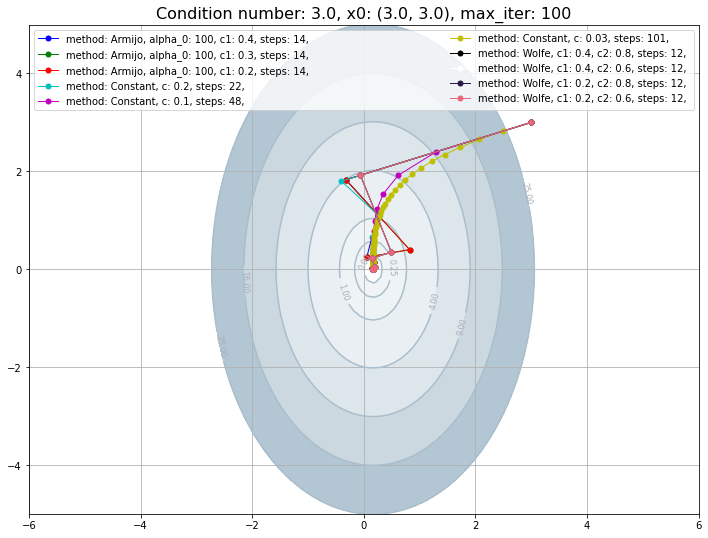

In [3]:
def make_label(option):
    res = ''
    for key in option:
        res += key + ': ' + str(option[key]) + ', '
    return res

def plot_graphs(A , b, x0, options, max_iter=100):
    plt.figure(figsize=(12, 9))
    oracle = oracles.QuadraticOracle(A, b)
    plot_levels(oracle.func)
    colors = list("bgrcmykw")
    for i in range(len(options) - len(colors)):
        colors.append(np.random.rand(3, ))
    for color, option in zip(colors, options):
        method = methods.GradientDescent(
            oracle, x0,
            line_search_options = option)
        method.run(max_iter=max_iter)
        steps = len(method.hist['time'])
        if True or (steps <= max_iter):
            option['steps'] = len(method.hist['time'])
            plot_trajectory(oracle.func, method.hist['x'], label=make_label(option), color=color)
            plt.legend(ncol=2, mode='expand')
        
    plt.title('Condition number: ' + str(np.linalg.cond(A)) + ', x0: ' + str(tuple(x0)) +
               ', max_iter: ' + str(max_iter), fontdict={'fontsize' : 16});


options = [{'method': 'Armijo', 'alpha_0': 100, 'c1': 0.4},
           {'method': 'Armijo', 'alpha_0': 100, 'c1': 0.3},
           {'method': 'Armijo', 'alpha_0': 100, 'c1': 0.2},
           {'method': 'Constant', 'c': 0.2},
           {'method': 'Constant', 'c': 0.1},
           {'method': 'Constant', 'c': 0.03},
            {'method': 'Wolfe', 'c1': 0.4, 'c2': 0.8},
           {'method': 'Wolfe', 'c1': 0.4, 'c2': 0.6},
           {'method': 'Wolfe', 'c1': 0.2, 'c2': 0.8},
           {'method': 'Wolfe', 'c1': 0.2, 'c2': 0.6}
           ]

A = np.diag([6, 2])
b = np.array([1, 0])
x0 = np.ones(2) * 3

plot_graphs(A , b, x0, options)


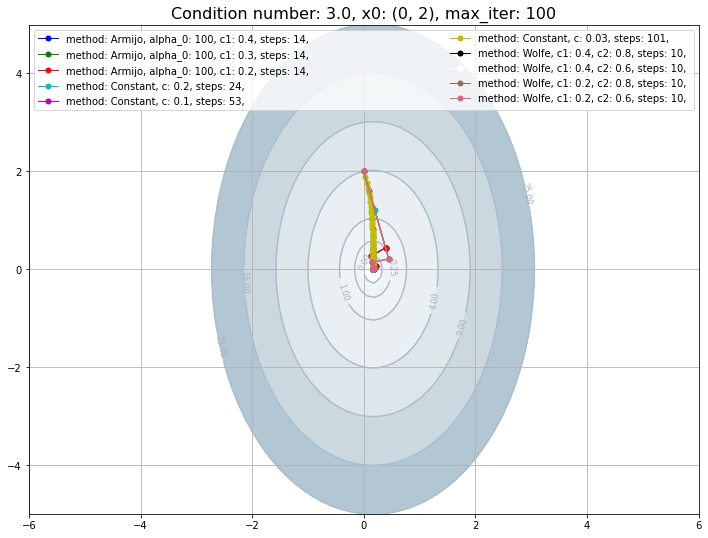

In [4]:
A = np.diag([6, 2])
b = np.array([1, 0])
x0 = np.array([0, 2])

plot_graphs(A , b, x0, options)

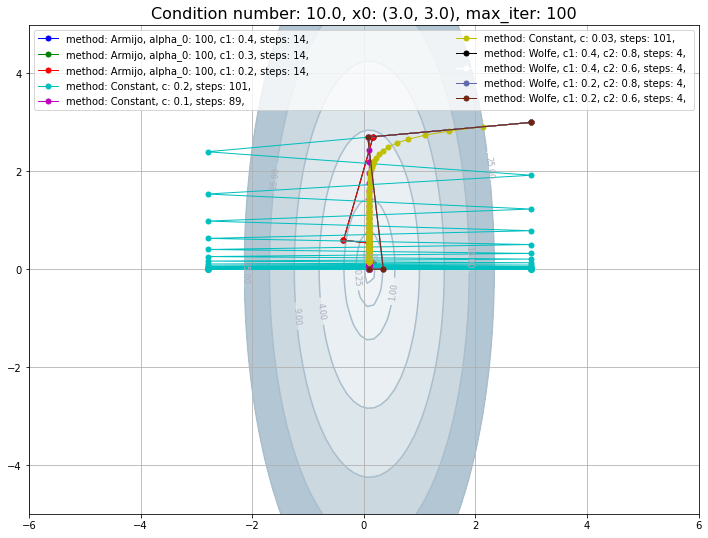

In [5]:
A = np.diag([10, 1])
b = np.array([1, 0])
x0 = np.ones(2) * 3

plot_graphs(A , b, x0, options)

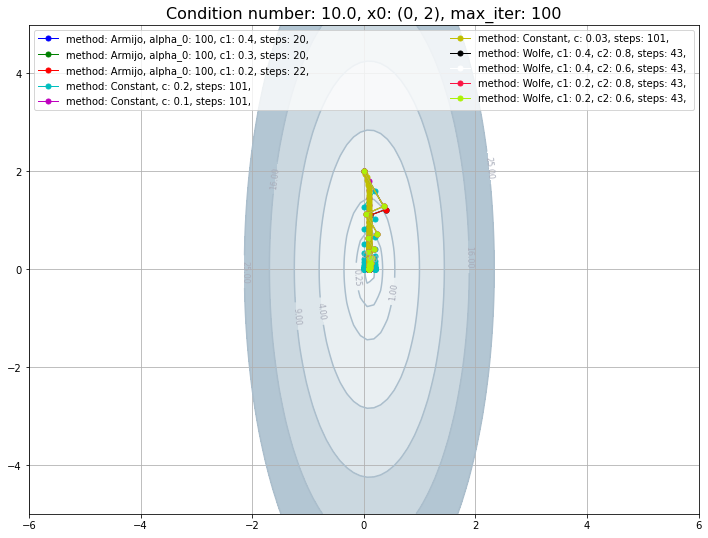

In [6]:
A = np.diag([10, 1])
b = np.array([1, 0])
x0 = np.array([0, 2])

plot_graphs(A , b, x0, options)

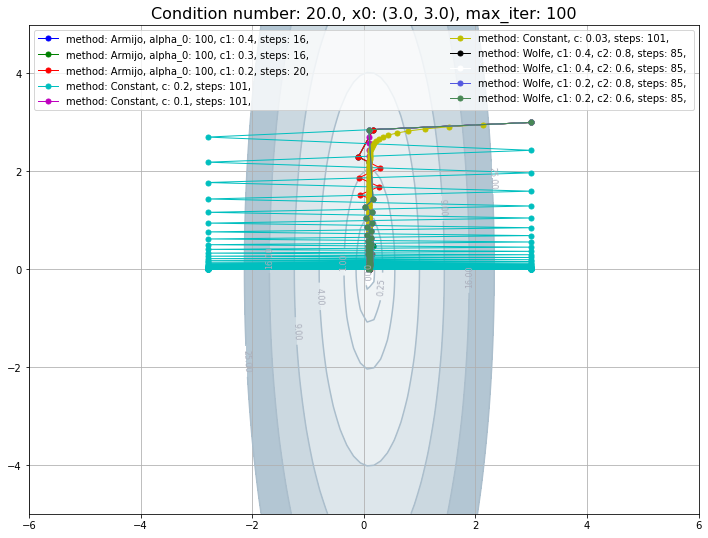

In [7]:
A = np.diag([10, 0.5])
b = np.array([1, 0])
x0 = np.ones(2) * 3

plot_graphs(A , b, x0, options)

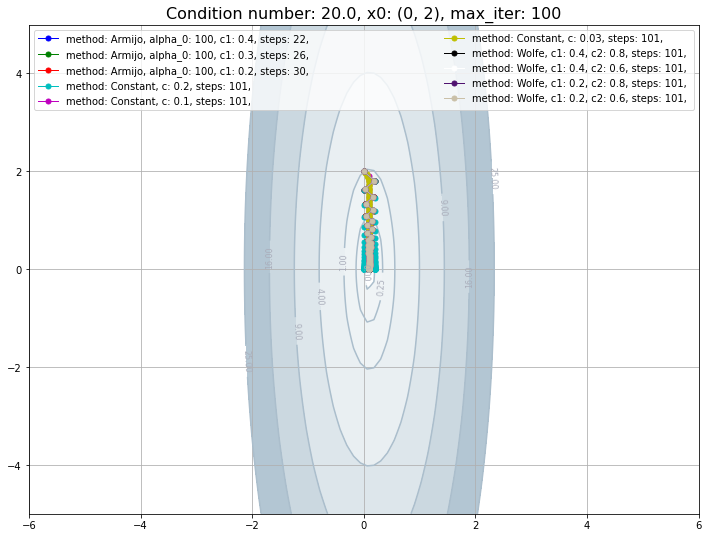

In [8]:
A = np.diag([10, 0.5])
b = np.array([1, 0])
x0 = np.array([0, 2])

plot_graphs(A , b, x0, options)

### Вывод 

С ростом числа обусловленности становится больше итераций. Начальная точка оказывает большое влияние на сходимость, если длина шага выбирается по правилу Вульфа. Константный шаг очень неустоучив.
Но метод Армихо в целом показывает хорошие результаты и кажется лучшим решением в квадратичных задачах

### 2.3 Зависимость числа итераций градиентного спуска от числа обусловленности и размерности пространства (3 балла)

In [9]:
def sample_matrix(n, k):
    ev = np.random.random(size=n - 2) * (k - 1.1) + 1.1
    ev = np.hstack([1, ev, k])
    A = np.diag(ev)
    return A

In [10]:
n_values = [10 ** i for i in range(1, 4)]
k_values = np.arange(2, 21)
max_iter=1e3
option = {'method': 'Armijo', 'alpha_0': 100, 'c1' : 0.4}
results = {}
set_size = 10
for n in n_values:
    results[n] = []
    b = np.zeros(n)
    x0 = np.ones(n) * 5
    for j in range(set_size):
        t = []
        for k in k_values:
            A = sample_matrix(n, k)
            oracle = oracles.QuadraticOracle(A, b)
            method = methods.GradientDescent(
                oracle, x0,
                line_search_options = option)
            method.run(max_iter=max_iter)
            t.append(len(method.hist['time']))
        results[n].append(t)


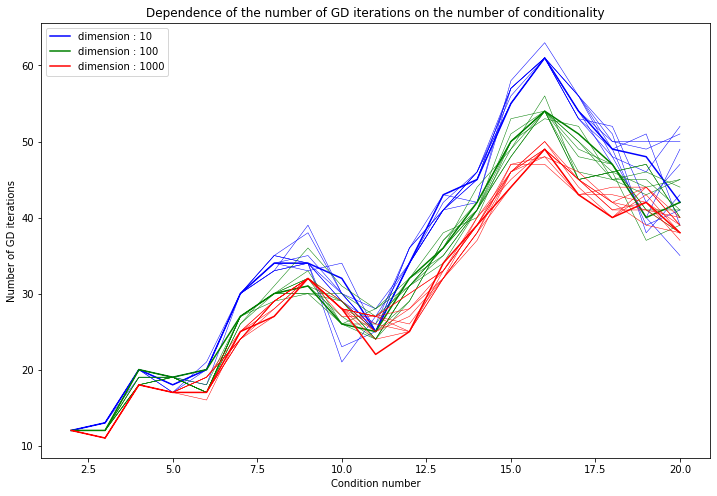

In [11]:
colors = list("bgr")
plt.figure(figsize=(12, 8))
for color, n in zip(colors, results):
    for t in results[n][:-1]:
        plt.plot(k_values, t, color=color, lw=0.5)
    plt.plot(k_values, results[n][-1], color=color, label='dimension : ' + str(n))
plt.legend(loc='upper left');
plt.xlabel('Condition number')
plt.ylabel('Number of GD iterations');
plt.title('Dependence of the number of GD iterations on the number of conditionality');
    

### 2.4 Градиентный спуск на задаче логистической регрессии (3 балла)

In [12]:
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [23]:
X1_train, y1_train = load_svmlight_file('a9a')
X1_test, y1_test = load_svmlight_file('a9a.t')
X1_train = X1_train[:, :-1]

In [ ]:
X3_train, X3_test, y3_train, y3_test = train_test_split(*load_svmlight_file('real-sim.bz2'), test_size=0.33, random_state=42)

In [ ]:
X2_train, y2_train = load_svmlight_file('gisette_scale.bz2')
X2_test, y2_test = load_svmlight_file('gisette_scale.t.bz2')

In [48]:
def train_method(X, y, max_iter=100, regcoef=None, option=None, w0=None, add_bias=False):
    
    if add_bias:
        X = sps.hstack([X, np.ones((X.shape[0], 1))])

    if regcoef is None:
        regcoef = 1 / y.size

    if w0 is None:
        w0 = np.zeros(X.shape[1])

    if option is None:
        option = {'method': 'Armijo', 'alpha_0': 100, 'c1' : 0.4}

    oracle = oracles.create_log_reg_oracle(X, y, regcoef)
    method = methods.GradientDescent(oracle, w0,
            line_search_options = option)
    method.run(max_iter=max_iter)

    return method

def predict(X, w, border=0.5, add_bias=False):
    if add_bias:
        X = sps.hstack([X, np.ones((X.shape[0], 1))])
    pred = np.log(1 + np.exp(-X @ w))
    pos = pred < border
    neg = ~pos
    pred[pos] = 1
    pred[neg] = -1
    return pred


In [40]:
options = [{'method': 'Armijo', 'alpha_0': 100, 'c1': 0.4},
           {'method': 'Armijo', 'alpha_0': 100, 'c1': 0.3},
           {'method': 'Armijo', 'alpha_0': 100, 'c1': 0.2},
           {'method': 'Constant', 'c': 0.2},
           {'method': 'Constant', 'c': 0.1},
           {'method': 'Constant', 'c': 0.03},
            {'method': 'Wolfe', 'c1': 0.4, 'c2': 0.8},
           {'method': 'Wolfe', 'c1': 0.4, 'c2': 0.6},
           {'method': 'Wolfe', 'c1': 0.2, 'c2': 0.8},
           {'method': 'Wolfe', 'c1': 0.2, 'c2': 0.6}
           ]

In [54]:
def plot_logreg(X_train, X_test, y_train, y_test):
    regcoef = 1 / y_train.size
    best_acc = 0
    best_options = None
    plt.figure(figsize=(12, 8))
    for option in options:
        method = train_method(X_train, y_train, regcoef=regcoef,
                option=option, add_bias=True)
        w = method.hist['x_star'][0]
        plt.plot(method.hist['func'], label=make_label(option))
        y_pred = predict(X_test, w, add_bias=True)
        if  accuracy_score(y_test, y_pred) > best_acc:
            best_acc = accuracy_score(y_test, y_pred)
            best_options = option
    plt.legend()
    plt.ylabel('error function value')
    plt.xlabel('steps')
    print('best acc: ', accuracy_score(y_test, y_pred), 'best options: ', make_label(best_options))

best acc:  0.8458939868558443 best options:  method: Wolfe, c1: 0.2, c2: 0.6, 


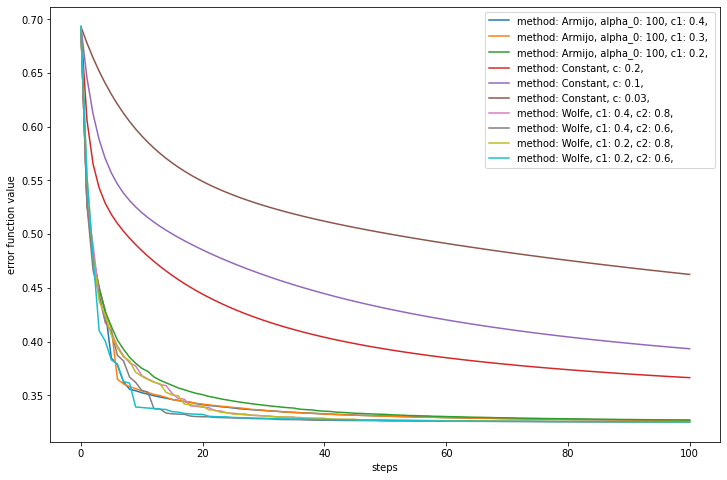

In [55]:
plot_logreg(X1_train, X1_test, y1_train, y1_test)

In [17]:
plot_logreg(X2_train, X2_test, y2_train, y2_test)

f1:  0.8913282107574094 acc:  0.901


best acc:  0.8538261671276507 best options:  method: Armijo, alpha_0: 100, c1: 0.4, 


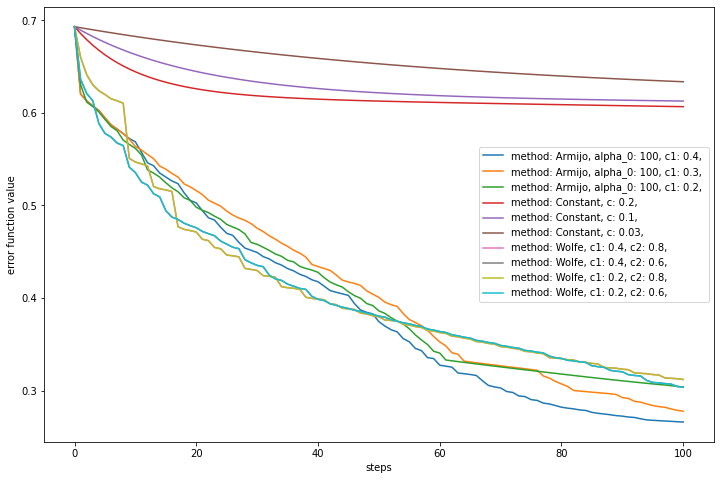

In [56]:
plot_logreg(X3_train, X3_test, y3_train, y3_test)